In [1]:
import numpy as np

import pandas as pd

import neurokit2 as nk


In [39]:
import pickle

train_dataset_path = "data/cinc2017/challenge2017_allclasses.pkl"
train_pkl_file = open(train_dataset_path, 'rb')
res_train = pickle.load(train_pkl_file)

<Axes: >

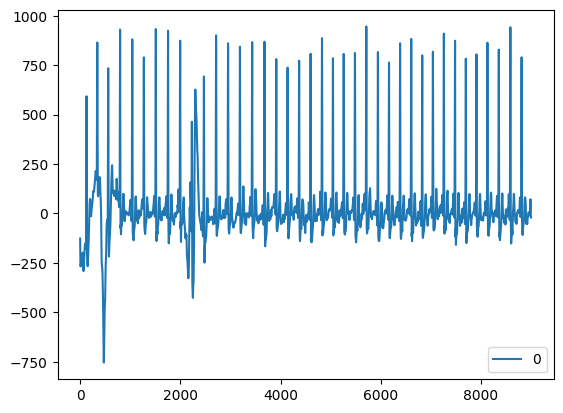

In [40]:
pd.DataFrame(res_train["data"][0]).plot()

In [41]:
all_data = []
for i, each_data in enumerate(res_train["data"]):
    desired_length_value = int(len(res_train["data"][i])/300)
    res_train["data"][i] = nk.signal_resample(each_data, desired_length=desired_length_value*128, sampling_rate=300, desired_sampling_rate=128, method="FFT")


In [44]:
with open('data/cinc2017/challenge2017_allclasses_128hz.pkl',  'wb') as fout:
    pickle.dump(res_train, fout)

In [60]:

all_train_data = []

for i, each_data in enumerate(res_train["X_train"]):
    all_train_data.append(nk.signal_resample(res_train["X_train"][i].ravel(), sampling_rate=300, desired_sampling_rate=128, method="FFT").reshape(1,-1))
train_data = np.stack(all_train_data)


all_val_data = []

for i, each_data in enumerate(res_train["X_val"]):
    all_val_data.append(nk.signal_resample(res_train["X_val"][i].ravel(), sampling_rate=300, desired_sampling_rate=128, method="FFT").reshape(1,-1))
val_data = np.stack(all_val_data)

In [61]:
test_dataset_path = "data/cinc2017/preprocessed_test/preprocessed_test.pkl"
test_pkl_file = open(test_dataset_path, 'rb')
res_test = pickle.load(test_pkl_file)

In [62]:
all_test_data = []

for i, each_data in enumerate(res_test["X_test"]):
    all_test_data.append(nk.signal_resample(res_test["X_test"][i].ravel(), sampling_rate=300, desired_sampling_rate=128, method="FFT").reshape(1,-1))
test_data = np.stack(all_test_data)

In [64]:

with open('data/cinc2017/frequency_standard/x_train_128hz.pkl',  'wb') as fout:
    pickle.dump(train_data, fout)
    
with open('data/cinc2017/frequency_standard/y_train_128hz.pkl',  'wb') as fout:
    pickle.dump(res_train["Y_train"], fout)

In [66]:

with open('data/cinc2017/frequency_standard/x_val_128hz.pkl',  'wb') as fout:
    pickle.dump(val_data, fout)
    
with open('data/cinc2017/frequency_standard/y_val_128hz.pkl',  'wb') as fout:
    pickle.dump(res_train["Y_val"], fout)

In [68]:

with open('data/cinc2017/frequency_standard/x_test_128hz.pkl',  'wb') as fout:
    pickle.dump(test_data, fout)
    
with open('data/cinc2017/frequency_standard/y_test_128hz.pkl',  'wb') as fout:
    pickle.dump(res_test["Y_test"], fout)